Master in Cyber Security: CNA EXAM - Complex Network Analysis {-}
====================================

Francesco Fornasieri, Davide Continanza, Alessandro Paolillo,  2023 {-}
----------------

# Analysis of Complex Networks with python and igraph {-}
#stuff



# Part 0. Import useful stuff {-}

In [7]:
# interactive plots in Jupyter, used to show plots inline in the notebook
%matplotlib inline

# The igraph library
from igraph import *

# Numpy for enhanced math array management
import numpy as np
import pandas as pd
# statistical tools (we only use ECDF)
from statsmodels.distributions.empirical_distribution import ECDF

# Mathematical plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# use to control whether to show the entire cell output or only the last_expr (default)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# to generate random numbers
from random import *

# to fit power law distributions
from powerlaw import *

# Part 1. Reading graphs from files / Writing graphs to files

In [18]:
#fg = read("../dataset/soc-redditHyperlinks-body.tsv", format = "csv", directed = True)
df = pd.read_table('../dataset/soc-redditHyperlinks-body.tsv')
df2 = pd.read_table('../dataset/soc-redditHyperlinks-title.tsv')
df_joined = pd.concat([df,df2])
df_joined.head()
#df = df[0:500] #small subset
df_joined = df_joined[["SOURCE_SUBREDDIT","TARGET_SUBREDDIT"]] #only nodes as info
g = Graph.DataFrame(df_joined, directed=True, use_vids=False)
#Gm = Graph.TupleList(df, directed = True)
#g = Graph.Read_Ncol("../dataset/soc-redditHyperlinks-body.tsv", directed=True)
#print (read())

SOURCE_SUBREDDIT TARGET_SUBREDDIT  POST_ID            TIMESTAMP  \
0  leagueoflegends  teamredditteams  1u4nrps  2013-12-31 16:39:58   
1       theredlion           soccer   1u4qkd  2013-12-31 18:18:37   
2     inlandempire           bikela  1u4qlzs  2014-01-01 14:54:35   
3              nfl              cfb  1u4sjvs  2013-12-31 17:37:55   
4       playmygame          gamedev  1u4w5ss  2014-01-01 02:51:13   

   LINK_SENTIMENT                                         PROPERTIES  
0               1  345.0,298.0,0.75652173913,0.0173913043478,0.08...  
1              -1  101.0,98.0,0.742574257426,0.019801980198,0.049...  
2               1  85.0,85.0,0.752941176471,0.0235294117647,0.082...  
3               1  1124.0,949.0,0.772241992883,0.0017793594306,0....  
4               1  715.0,622.0,0.777622377622,0.00699300699301,0....

### A summary of the graph:

In [19]:
summary(g, verbosity=2, max_rows = 8, edge_list_format = 'edgelist')

IGRAPH DN-- 67180 858488 -- 
+ attr: name (v)
+ edges (vertex names):
                    edge              
[0]   leagueoflegends->teamredditteams
[1]   theredlion->soccer              
[2]   inlandempire->bikela            
[3]   nfl->cfb                        
[4]   playmygame->gamedev             
[5]   dogemarket->dogecoin            
[6]   locationbot->legaladvice        
[7]   indiefied->aww                  


### Giant Component:

In [20]:
# Check whether the graph is connected or not
g.is_connected(mode = "WEAK")
# Compute the connected components in the graph
#   - "WEAK" does not consider the direction of edges
g_conn_comp = g.connected_components(mode = "WEAK")

# the number of components
len(g_conn_comp)

# the membership of vertices in the components
#g_conn_comp.membership

# the sizes of the components
#g_conn_comp.sizes()

# the vertex IDs of the first components
#g_conn_comp[0]

# the Giant Componet (the biggest components)
g_GC = g_conn_comp.giant()
summary(g_GC, verbosity = 1, edge_list_format = "edgelist")

False

712

IGRAPH DN-- 65648 857523 -- 
+ attr: name (v)
+ edges (vertex names):
                              edge                    
[0]       leagueoflegends->teamredditteams            
[1]       theredlion->soccer                          
[2]       inlandempire->bikela                        
[3]       nfl->cfb                                    
[4]       playmygame->gamedev                         
[5]       dogemarket->dogecoin                        
[6]       locationbot->legaladvice                    
[7]       indiefied->aww                              
[8]       posthardcore->bestof2013                    
[9]       posthardcore->corejerk                      
[10]      gfycat->india                               
[11]      metalcore->bestof2013                       
[12]      metalcore->corejerk                         
[13]      suicidewatch->offmychest                    
[14]      dogecoin->novacoin                          
[15]      gaming4gamers->fallout                  

# Part 4. Degree Analysis

In [41]:
# degree() method
# - mode = "ALL" to consider the undirected graph
g_deg = g_GC.degree(mode = "all")
g_deg[0:19]

# the maximum degree, and the ID of the node with maximum degree
max(g_deg)
id_max = np.argmax(g_deg)
id_max

# the set of neighbours of the node with max degree
# - NB: in case of bidirectional links, the same neighbour is counted twice if mode = 'all'
nei = g_GC.neighbors(id_max, mode="all")
print("nei")
len(nei)

# the set of nodes reachable from id_max with AT MOST 1 jump
neighbours = g_GC.neighborhood(id_max, order = 1, mode="all")
neighbours[0:19]

# the number of such nodes
# - NB: it also includes the node id_max itself (which is reachable with 0 jumps)
# - thus, the number of nodes reachable with one jump is this - 1
print("vicini")
len(neighbours)
g_GC.neighborhood_size(id_max, order = 1, mode="all")





# take the undirected version of the Giant Component 
# combine_edges tells what to do with the weights (default, lost attribute; here: sum values)
g_GC_u = g_GC.as_undirected(combine_edges = "sum")
g_GC_u.is_simple()
# Note the lower number of edges with respect to the directed version.
# This is because igraph automatically simplifies the graph (i.e., merges edges between the same nodes)
# to do so manually on a multi-edge graph: g.simplify()
# to check if the graph is simple or not: g.is_simple()
#summary(g_GC_u, verbosity = 1, edge_list_format = "edgelist", max_rows = 25)
#summary(g_GC, verbosity = 1, edge_list_format = "edgelist", max_rows = 25)

# the maximum degree, and the ID of the node with maximum degree
g_deg_u = g_GC_u.degree()
print("grado massimo: ",max(g_deg_u))
id_max_u = np.argmax(g_deg_u)
print("id del nodo con massimo grado ",id_max_u)

# the set of neighbours of the node with max degree
nei_u = g_GC_u.neighbors(id_max_u)
print("nei")
print(len(nei_u), "lunghezza insieme ", len(set(nei_u)))
#print(nei_u[0:10])


# the set of nodes reachable from id_max with AT MOST 1 jump
neighbours = g_GC_u.neighborhood(id_max_u, order = 1, mode="all")
#neighbours[0:19]

# the number of such nodes
# - NB: it also includes the node id_max itself (which is reachable with 0 jumps)
# - thus, the number of nodes reachable with one jump is this - 1
print("lunghezza vicinato ", len(neighbours), )
g_GC_u.neighborhood_size(id_max, order = 1, mode="all")

[6202,
 104,
 31,
 4717,
 28,
 17,
 4997,
 1941,
 128,
 1222,
 653,
 4148,
 196,
 3377,
 13,
 3118,
 260,
 26,
 273]

31143

122

nei


31143

[122, 0, 2, 3, 4, 6, 7, 9, 10, 11, 13, 15, 16, 18, 20, 21, 23, 25, 26]

vicini


3531

3531

True

grado massimo:  5547
id del nodo con massimo grado  59
nei
5547 lunghezza insieme  5547
lunghezza vicinato  5548


3531

# Part 5. Equivalent graphs and fitting

## Random graphs



65643

65648

NameError: name 'fb_ecdf' is not defined

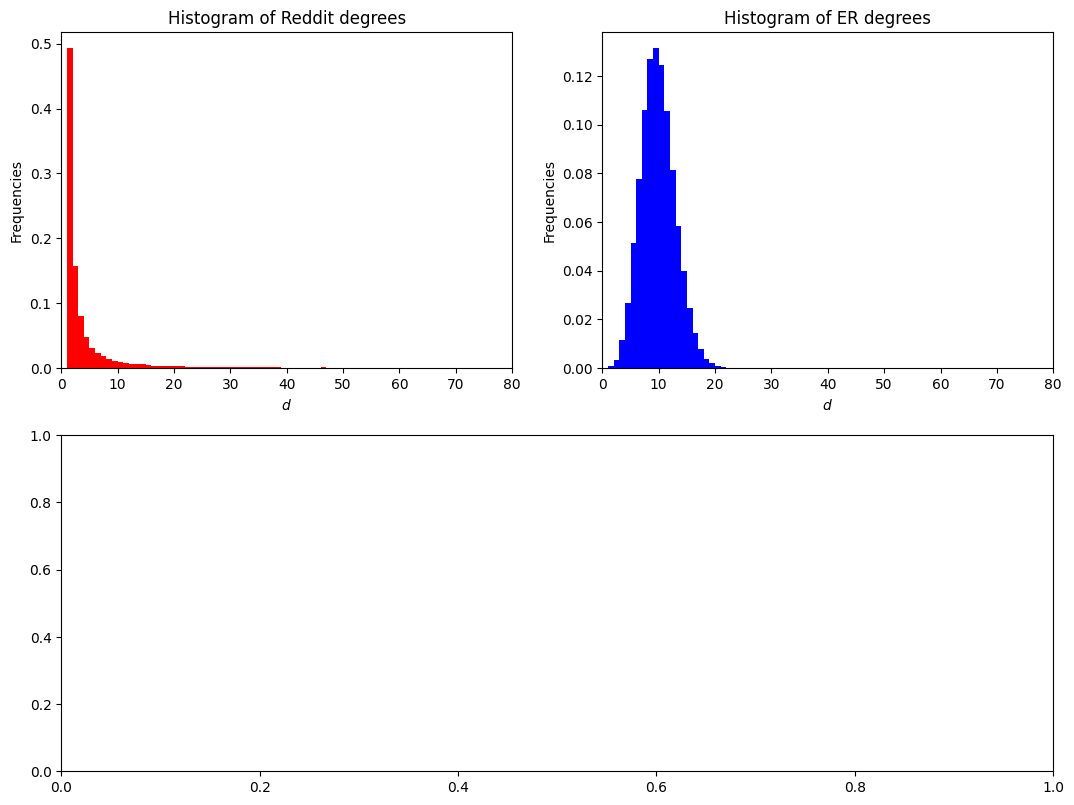

In [45]:
# scale the fig size twice in length
default_sizes = plt.rcParams["figure.figsize"]
fig_sizes = (2*default_sizes[0], default_sizes[1])


# Now we compare the degree distributions for the complete fb Giant Component
er_p_GC = mean(g_GC_u.degree())/g_GC_u.vcount()
er_g_all = Graph.Erdos_Renyi(g_GC_u.vcount(), er_p_GC)

# take only the Giant Component
er_g = er_g_all.connected_components(mode = "WEAK").giant()
er_g.vcount()
g_GC_u.vcount()


# we use GridSpecs for a finer control of the plot positioning
fig_sizes = (fig_sizes[0], 2*default_sizes[1])
f = plt.figure(figsize = fig_sizes)

# create a 2x2 Grid Specification
gs = gridspec.GridSpec(2, 2)

# add subplots to the figure, using the GridSpec gs
# position [0,0] (upper-left corner)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
# the third plot spans the entire second row
ax3 = plt.subplot(gs[1,:])

# compute and plot the histogram of Reddit degrees
d_g = g_GC_u.degree()
_,_,_ = ax1.hist(d_g, bins=range(1,max(d_g)+2), density = True, color = 'red')
_ = ax1.set_xlim(0,80)
_ = ax1.set_xlabel("$d$")
_ = ax1.set_ylabel("Frequencies")
_ = ax1.set_title("Histogram of Reddit degrees")


# compute and plot the histogram of ER degrees
d_er = er_g.degree()
_,_,_ = ax2.hist(d_er, bins=range(1,max(d_er)+2), density = True, color = 'blue')
_ = ax2.set_xlim(0,80)
_ = ax2.set_xlabel("$d$")
_ = ax2.set_ylabel("Frequencies")
_ = ax2.set_title("Histogram of ER degrees")

# compute and plot the degree CCDFs
g_ecdf = ECDF(d_g)
er_ecdf = ECDF(d_er)
x = np.arange(1,max(d_g)+1)
_ = ax3.loglog(x, 1-g_ecdf(x), 'ro', label = 'Reddit')
x = np.arange(1,max(d_er)+1)
_ = ax3.loglog(x, 1-er_ecdf(x), 'bo', label = 'Erdos-Renyi')
_ = ax3.set_xlabel("$d$")
_ = ax3.set_ylabel("$P(D>d)$")
_ = ax3.set_title("Comparison between degree CCDFs")
_ = ax3.legend(numpoints = 1)